In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import keras.applications as models
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import cv2 as cv
from keras.utils import np_utils
import tensorflow.keras.layers as tfl

In [ ]:
#@title Transfer Learning with EfficientNetB0
image_name = 'wallet.jpg'

Net = models.EfficientNetB0(weights = 'imagenet')
Size = (224, 224)
image = cv.imread(image_name, cv.IMREAD_UNCHANGED)
image_resized = cv.resize(image, Size)
plt.imshow(image_resized)
image_expanded_resized = np.expand_dims(image_resized, axis = 0)
pred = Net.predict(image_expanded_resized)
labels = models.efficientnet.decode_predictions(pred, top = 3)[0]
for i in range(3):
  print(f'Label 1: {labels[i][1]} \tProb: {labels[i][2]}')

1/1 [==============================] - 3s 3s/step
Not found in the dataset!


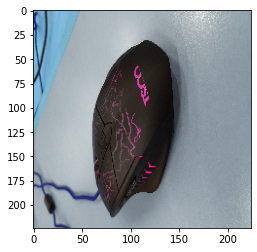

In [ ]:
#@title Troubleshooting a problem in EffifientNet

image_name = 'mouse.jpg'
Net = models.EfficientNetB0(weights = 'imagenet')
Size = (224, 224)
image = cv.imread(image_name, cv.IMREAD_UNCHANGED)
image_resized = cv.resize(image, Size)
plt.imshow(image_resized)
image_expanded_resized = np.expand_dims(image_resized, axis = 0)
pred = Net.predict(image_expanded_resized)
labels = models.efficientnet.decode_predictions(pred, top = 5)[0]
if (labels[0][2] < 0.25):
  print("Not found in the dataset!")
else:
  print(f'Label: {labels[0][1]} \tProbability: {labels[0][2]}')


In [ ]:
#@title Training EfficientNet with a new dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = ['airplane','automoblie','bird','cat','deer','dog','frog','horse',"ship",'truck']

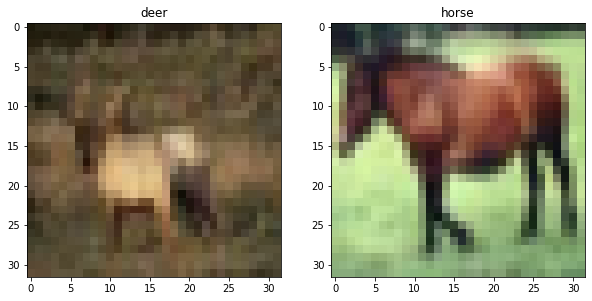

In [ ]:
idx1 = np.argwhere(y_train == 4)[:,0]
idx2 = np.argwhere(y_train == 7)[:,0]

x_deer = x_train[idx1]
x_horse = x_train[idx2]
y_deer = y_train[idx1]
y_horse = y_train[idx2]

x_deer_train = x_deer[:150]
x_deer_test = x_deer[150:200]
x_horse_train = x_horse[:150]
x_horse_test = x_horse[150:200]
y_deer_train = y_deer[:150]
y_deer_test = y_deer[150:200]
y_horse_train = y_horse[:150]
y_horse_test = y_horse[150:200]

fig = plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title(classes[4])
plt.imshow(x_deer[0])
plt.subplot(1,2,2)
plt.title(classes[7])
plt.imshow(x_horse[0])


Epoch 1/10
10/10 [==============================] - 11s 278ms/step - loss: 0.6935 - accuracy: 0.4800
Epoch 2/10
10/10 [==============================] - 3s 280ms/step - loss: 0.6931 - accuracy: 0.5033
Epoch 3/10
10/10 [==============================] - 3s 285ms/step - loss: 0.6932 - accuracy: 0.5033
Epoch 4/10
10/10 [==============================] - 3s 282ms/step - loss: 0.6931 - accuracy: 0.5033
Epoch 5/10
10/10 [==============================] - 3s 283ms/step - loss: 0.6935 - accuracy: 0.4767
Epoch 6/10
10/10 [==============================] - 3s 283ms/step - loss: 0.6938 - accuracy: 0.5100
Epoch 7/10
10/10 [==============================] - 3s 285ms/step - loss: 0.6930 - accuracy: 0.5067
Epoch 8/10
10/10 [==============================] - 3s 286ms/step - loss: 0.6925 - accuracy: 0.5567
Epoch 9/10
10/10 [==============================] - 3s 289ms/step - loss: 0.6929 - accuracy: 0.5200
Epoch 10/10
4/4 [==============================] - 1s 68ms/step
Accuracy = 50.999999046325684%
Test

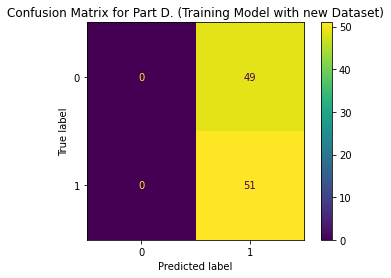

In [ ]:
z = np.append(x_deer_train,x_horse_train)
k = np.append(y_deer_train,y_horse_train)
p = np.append(x_deer_test,x_horse_test)
l = np.append(y_deer_test,y_horse_test)

xtrain = z.reshape(300,32,32,3)
ytrain = k.reshape(300,1)
xtest = p.reshape(100,32,32,3)
ytest = l.reshape(100,1)

ytrain[np.argwhere(ytrain == 4)] = 0
ytrain[np.argwhere(ytrain == 7)] = 1
ytest[np.argwhere(ytest == 4)] = 0
ytest[np.argwhere(ytest == 7)] = 1

x_train1 = []
x_test1 = []


for i in range(300):
  x_train1.append(cv.resize(x_train[i],(224,224)))
for i in range(100):
  x_test1.append(cv.resize(x_test[i],(224,224)))

x_train1 = np.array(x_train1)
x_test1 = np.array(x_test1)


Net = Sequential()
Net.add(models.EfficientNetB0(weights = 'imagenet'))
# Net.add(tfl.GlobalAveragePooling2D())
Net.add(Dense(500, activation = 'relu'))
Net.add(Dense(2, activation = 'softmax'))
optimizer = SGD(learning_rate=1e-2, momentum = 0.9)
Net.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
History = Net.fit(x_train1, to_categorical(ytrain), epochs = 10)

loss_test, acc = Net.evaluate(x_test1, to_categorical(ytest), verbose = 0)
pred_test = np.argmax(Net.predict(x_test1), axis = 1)
ConfusionMatrixDisplay.from_predictions(ytest, pred_test)
plt.title('Confusion Matrix for Part D. (Training Model with new Dataset)')
print(f'Accuracy = {acc*100}%\nTest-loss = {loss_test}')